# Live Training for Pearson Learning
# Time Series Analysis and Forecasting for Beginners
# July 10, 2020


# Section 2: Exploratory Data Analysis and ARMA Model Formulation

<div class="alert alert-info"> 
    
<b>Note:</b> 

    
This is a relatively dense section, and the concepts and mathematical formualtion of ARMA model are, however, necessary for us to study the class of <b> Autoregressive Integrated Moving Average </b> model. 

    
The notes in this (and other notebooks) are meant for take-home review. For concepts and formulation set up using mathematical notations, I will discuss the formulation using my slides.

</div>

# Some basic concepts used in Time Series Analysis

#### Key Takeaway from this section:
1. An observed time series is treated as a realization of an underlying probability model.
2. We will study a certain class of probability model that comes with a very appealing (and simple) probability structure.
3. The concept of (weak) stationarity is a key requirement of the class of time series models that we will study.
4. The concept of autocorrelation function and (partial) autocorrelation function are a main tool for us to analyze a time series.

* The $\textbf{autocovariance function}$ is defined as

$$\gamma_{x}(s,t) = cov(x_s,x_t) = E[(x_s-\mu_s)(x_t-\mu_t)] \quad \forall s,t$$

* Two natural implications are $(1) \gamma_{x}(s,t) = \gamma_{x}(t,s)$ and $(2)$ $\gamma_{x}(s,s) = cov(x_s,x_s) = E[(x_s-\mu_s)^2]$

* A correlation of a variable with itself at different times is known as $\textit{autocorrelation}$. If a time series model is second-order stationary (i.e. stationary in both mean and variance: $\mu_t = \mu$ and $\sigma_t^2 = \sigma^2$ for all $t$), then an $\textit{autocovariance function}$ can be expressed as a function only of the time lag $k$:

$$ \gamma_k = E[(x_t-\mu)(x_{t+k} - \mu)] $$
  
* Likewise, the autocorrelation function *acf* is defined as

$$ \rho_k = \frac{\gamma_k}{\sigma^2} $$
  
* When $k=0$, $\rho_0 = 1$

#### Estimation of ($\mathbf{1^{st}}$ order) Dependency:

* Using the $\textit{moment principles}$, the $\textit{acvf}$ and $\textit{acf}$ can be estimated from a time series by their sample equivalents. The sample \emph{acvf} can be estimated using the following formula:

$$ \hat{\gamma}_k = \frac{1}{T} \sum_{t=1}^{T-k} \left( x_t - \bar{x} \right) \left( x_{t+k} - \bar{x} \right) $$

* Note that the sum is divided by $T$ and and not $T-k$.

* The sample $\textit{ACF}$ is defined by

$$ \frac{\hat{\gamma}_k}{\hat{\gamma}_0} = \frac{\frac{1}{T} \sum_{t=1}^{T-k} \left( x_t - \bar{x} \right) \left( x_{t+k} - \bar{x} \right)}{ \frac{1}{T} \sum_{t=1}^{T} \left( x_t - \bar{x} \right)^2} $$


#### Notion of Stationarity:


* A time series ${x_t}$ is said to be $\textit{strictly stationary}$ if the joint distributions $F(x_{t_1}, \dots, x_{t_n})$ and $F( x_{t_1+m}, \dots, x_{t_n +m})$ are the same, $\forall$ $t_1, ... t_n$ and $m$. This is a very strong condition, too strong to be applied in practice; it implies that the distribution is unchanged for any time shift!

* A weaker and more practical stationarity condition is that of $\textit{weakly stationary}$ (or $\textit{second order stationarity}$). A time series $x_t$ is said to be $\textit{weakly stationary}$ if it is mean and variance stationary and its autocovariance $Cov(x_t,x_{t+k})$ depends only the time displacement $k$ and can be written as $\gamma(k)$. 

* Second order stationarity plays an important role in many of the time series models we will discuss in this tutorial; if a time series is second order stationary, then once a distribution assumption, such as normality, is imposed, the series can be completely characterized by its mean and covariance structure.

## Mathematical formulation of ARIMA models

* A time series ${z_t}$ follows an ARIMA$(p,d,q)$ process if the $d^{th}$ differences of the ${z_t}$ series is an ARMA($p,q$) process. Using lag operator, it can expressed as 

$$\begin{equation}
  \phi_p(B)(1-B)^d z_t = \theta_q(B) \omega_t
\end{equation}$$

where $\phi_p$ and $\theta_q$ are polynomials of orders $p$ and $q$.

* Writing an ARIMA$(p,d,q)$ may seem too abstract, and whenever a model is presented this way, you may get a feel of the model by making simple cases, such as a low order ARIMA$(p,d,q)$ model. 



* Below show two such examples to unpack some of these notations:

$\textbf{Example 1:}$
Consider the model $ z_t = z_{t-1} + \omega_t + \theta \omega_{t-1}$.  Re-write this model using lag (or backward shift) operator. By now, we should be familiar with this kind of manipulation:

$$\begin{align}
   z_t &= z_{t-1} + \omega_t + \theta \omega_{t-1} \\
   z_t - z_{t-1} &= \omega_t + \theta \omega_{t-1} \\
  (1-B)z_t &= (1+\theta B)\omega_t
\end{align}$$

where $B$ is a lag operator that when applying to $z_t$, gives $z_{t-1}$. That is, $Bz_t = z_{t-1}$.

* This becomes an ARIMA(0,1,1) model, or $\textit{integrated moving average}$ model (IMA(1,1)).

$\textbf{Example 2:}$
Consider a model of the form

$$\begin{equation}
     z_t = \phi z_{t-1} + z_{t-1} - \phi z_{t-2} + \omega_t
\end{equation}$$

* Rewrite the equation, re-arrange terms, and factorize them:

$$\begin{align}
   z_t - z_{t-1} &= \phi (z_{t-1} - z_{t-2}) + \omega_t \\
   (z_t - z_{t-1}) - \phi (z_{t-1} - z_{t-2}) &= \omega_t \\
   (1 - \phi B)(z_t - z_{t-1}) &=  \omega_t \\
   (1 - \phi B) \bigtriangledown z_t &=  \omega_t \\
   (1 - \phi B)(1 - B)z_t  &= \omega_t
\end{align}$$

The model can be re-written as $(1 - \phi B) \bigtriangledown y_t  = \omega_t$, which is an ARIMA(1,1,0) model.

**Sidenotes**

A series ${z_t}$ is $\textit{integrated}$ of order $d$, denoted as $I(d)$, if the $d^{th}$ differences of ${z_t}$ is a white noise: $\bigtriangledown^d y_t = \omega_t$, where $\bigtriangledown^d \equiv (1-B)^d$:

$$\begin{equation}
  (1-B)^d y_t = \omega_t
\end{equation}$$

As such, random walk is the special case I(1).

* In practice, I(0) and I(1) cases find themselves having the most applications.



## An Overview of the Box-Jenkins Approach to Non-Seasonal ARIMA Modeling

1. Assess the stationarity of the process $z_t$
2. If the process is not stationary, difference it (i.e. create an integrated model) as many times as needed to produced a stationary process to be modeled using the $\textit{mixed autoregressive-moving average process}$ described above.
3. Identify (i.e. determining the order of the process) the resulting the ARMA model.
  * The sample autocorrelation and sample partial autocorrelation functions are tools used in step $1$ and $2$.

In practice, other steps are necessary in order to produce a functionable model. These steps include:
- Model diagnostic checking
- Re-specification of the model if one or more of the underlying statistical assumptions is not satisfied
- Model selection
- Perform statistical inference and/or forecasting
- Forecast evaluation

# Exploratory Time Series Data Analysis

* Now that we introduce the essential concepts for characterizing the probability structure of a time series, we will proceed to "$\textit{explore}$" these characteristics empirically.

* Specifically, we will use *time series plot, histogram (and its variants), plot of sample autocorrelation, and plot of sample partial autocorrelation}* to examine a given time series. 

* These visuals play a very crucial role in the $\textit{Box-Jenkins approach}$ to ARIMA modeling.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format='retina'

import sys
import os

import pandas as pd
import numpy as np

# TSA from Statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt

# Display and Plotting
import matplotlib.pylab as plt
import seaborn as sns

pd.set_option('display.float_format', lambda x: '%.5f' % x) # pandas
np.set_printoptions(precision=5, suppress=True) # numpy

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

# seaborn plotting style
sns.set(style='ticks', context='poster')

In [2]:
def tsplot(y, title='TITLE', xlabel='X Label', ylabel='Y Label', figsize=(12, 8)):
    '''
    Plot the time series plot
    '''
    fig, ax = plt.subplots(figsize=figsize)
        
    y.plot(ax=ax)
    
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    sns.despine()
    fig.tight_layout()

In [3]:
def tsplot2(y, lags=None, title='', figsize=(16, 10)):
    '''Examine the patterns of ACF and PACF, along with the time series plot and histogram.
    '''
    fig = plt.figure(figsize=figsize)
    layout = (2, 2)
    ts_ax   = plt.subplot2grid(layout, (0, 0))
    hist_ax = plt.subplot2grid(layout, (0, 1))
    acf_ax  = plt.subplot2grid(layout, (1, 0))
    pacf_ax = plt.subplot2grid(layout, (1, 1))
    
    y.plot(ax=ts_ax)
    ts_ax.set_title(title)
    y.plot(ax=hist_ax, kind='hist', bins=25)
    hist_ax.set_title('Histogram')
    smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
    smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
    [ax.set_xlim(0) for ax in [acf_ax, pacf_ax]]
    sns.despine()
    plt.tight_layout()
    return ts_ax, acf_ax, pacf_ax

<div class="alert alert-info">

<b> Exercise: </b>

Let use *series1.csv* and conduct the exploratory data analysis 
</div>

In [4]:
# Step 1: Import the csv file containing the series for the analysis

filename_ts = 'data/series1.csv'
ts_df = pd.read_csv(filename_ts, index_col=0, parse_dates=[0])

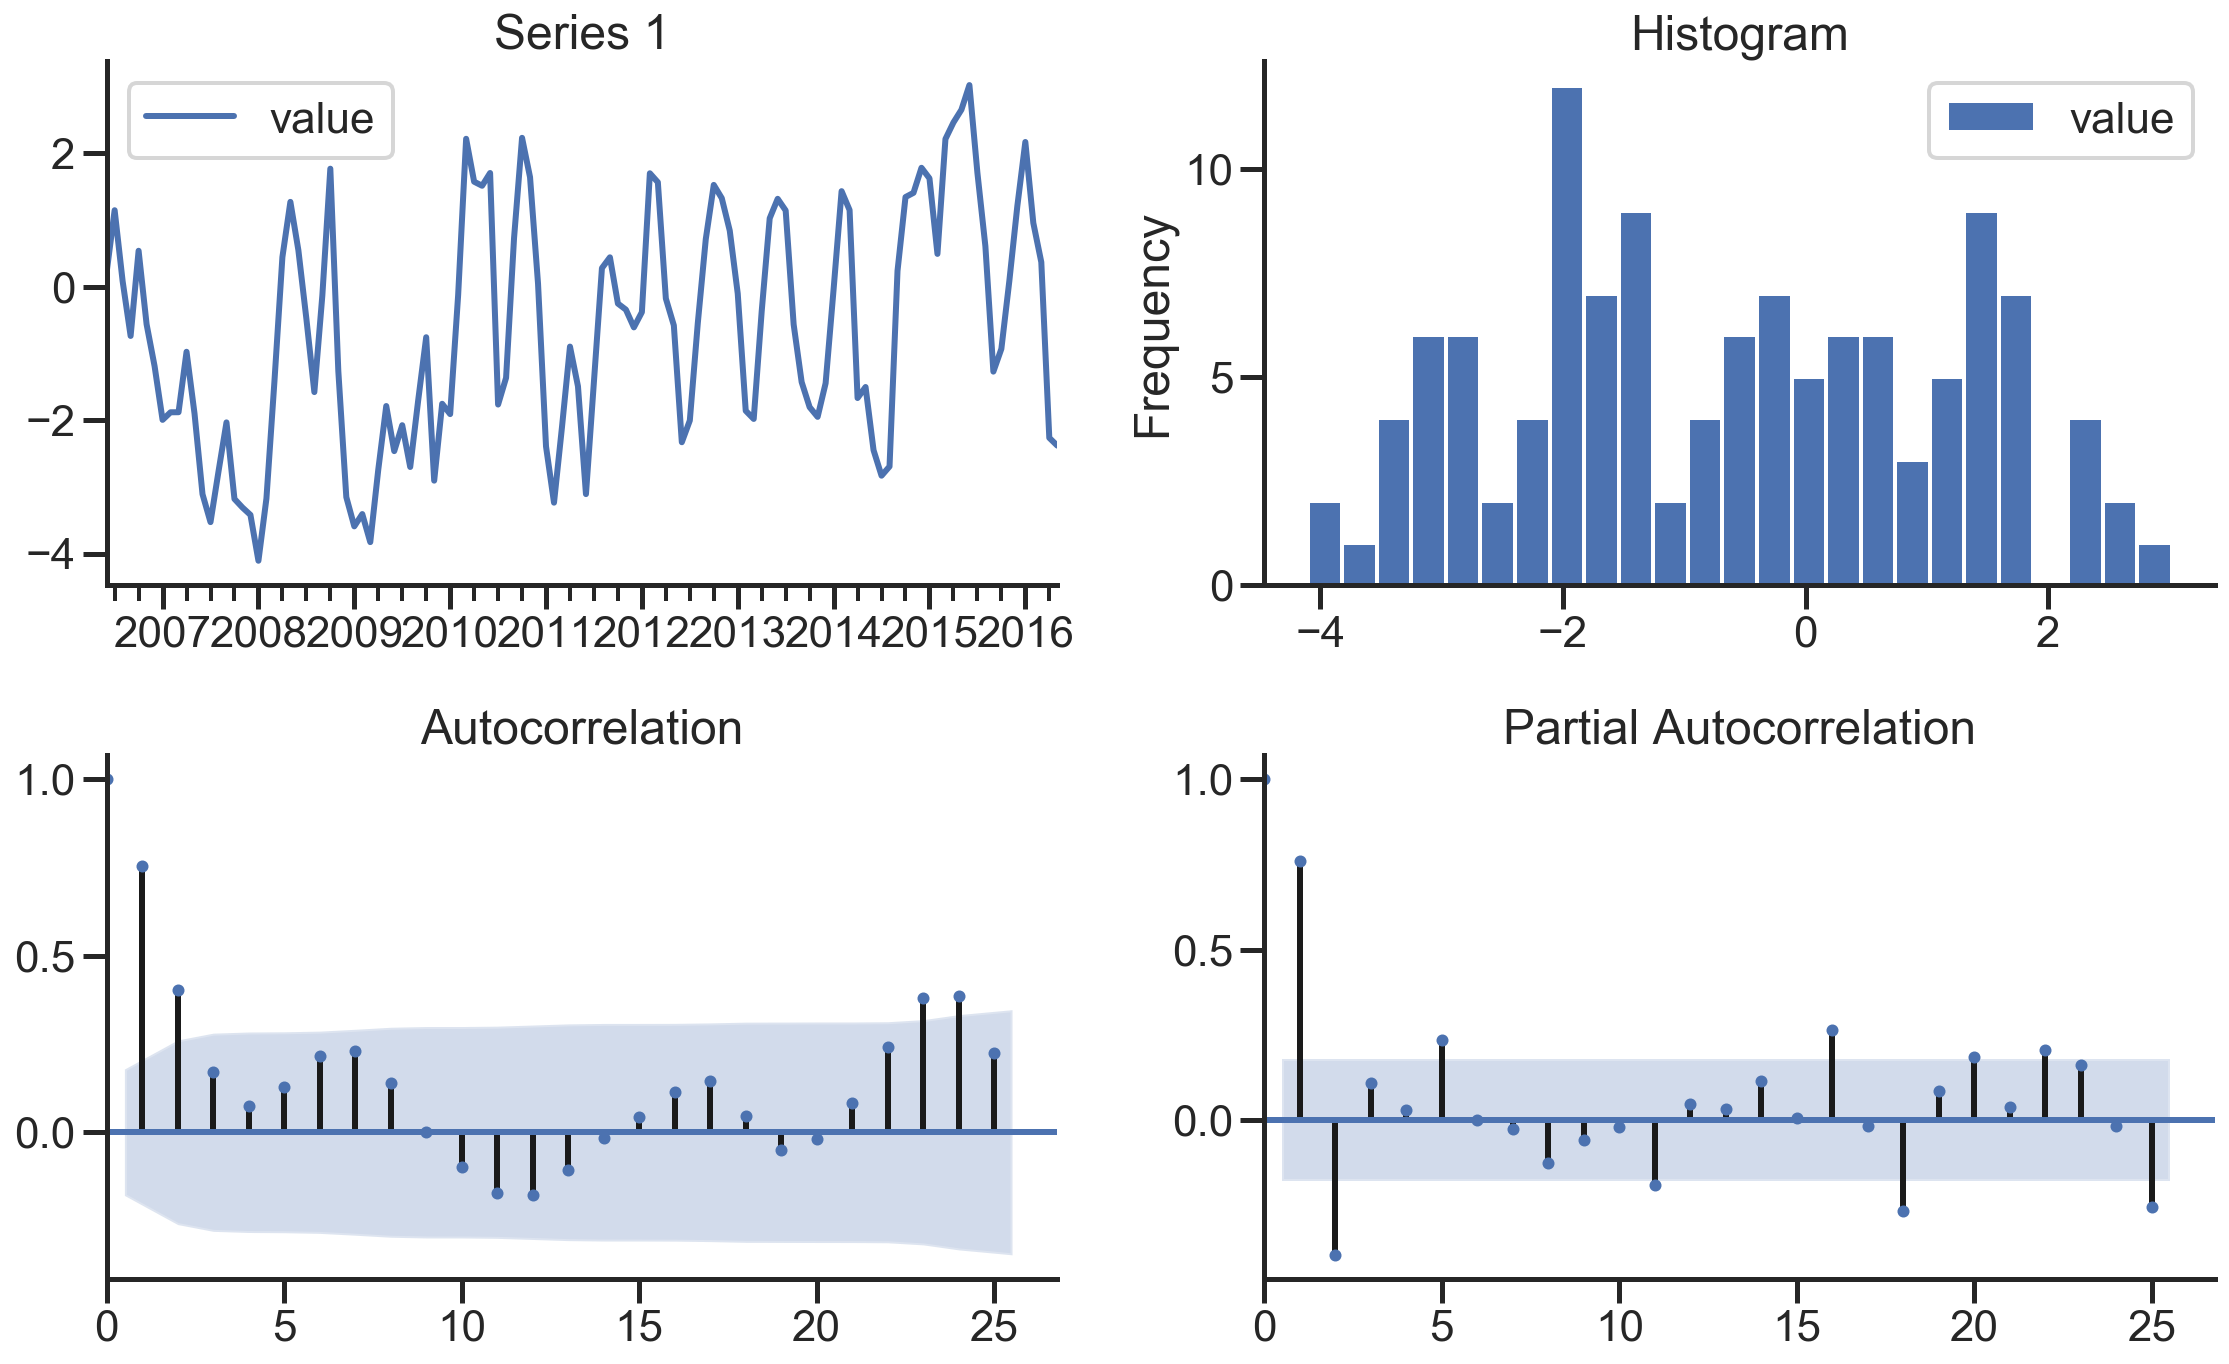

In [5]:
# Step 2: Explore the patterns of the time series and its autocorrelation and partial autocorrelation structure

# Choose the number of lags to display the sample ACF and PACF
n_lag=AN INTERGER TO BE HERE 
graph_title="PUT YOUR GRAPH TITLE HERE"

# Make sure the tsplot() function is defined before running the following command
tsplot2(ts_df, title=graph_title, lags=n_lag);

# ARMA Modeling

# An Example (based on a Simulated Series)

In [ ]:
from statsmodels.tsa.arima_process import arma_generate_sample
np.random.seed(12345678)

arparams = np.array([.75, -.25])
maparams = np.array([.65, .35])
# The conventions of the arma_generate function require 
# that we specify a 1 for the zero-lag of the AR and MA parameters 
# and that the AR parameters be negated.
arparams = np.r_[1, -arparams]
maparams = np.r_[1, maparams]

nobs = 240
y = arma_generate_sample(arparams, maparams, nobs)
dates = sm.tsa.datetools.dates_from_range('2000m1', length=nobs)
y = pd.Series(y, index=dates)

In [ ]:
y.to_csv('data/section2_example.csv')

In [6]:
y = pd.read_csv('data/section2_example.csv', index_col=0, parse_dates=[0])

In [7]:
y

,series
date,
2000-01-31,0.55371
2000-02-29,-0.68444
2000-03-31,-2.70131
2000-04-30,-4.71689
2000-05-31,-2.72486
...,...
2019-08-31,0.47511
2019-09-30,1.36145
2019-10-31,0.58916


In [8]:
y.tail()

,series
date,
2019-08-31,0.47511
2019-09-30,1.36145
2019-10-31,0.58916
2019-11-30,0.51916
2019-12-31,1.65916


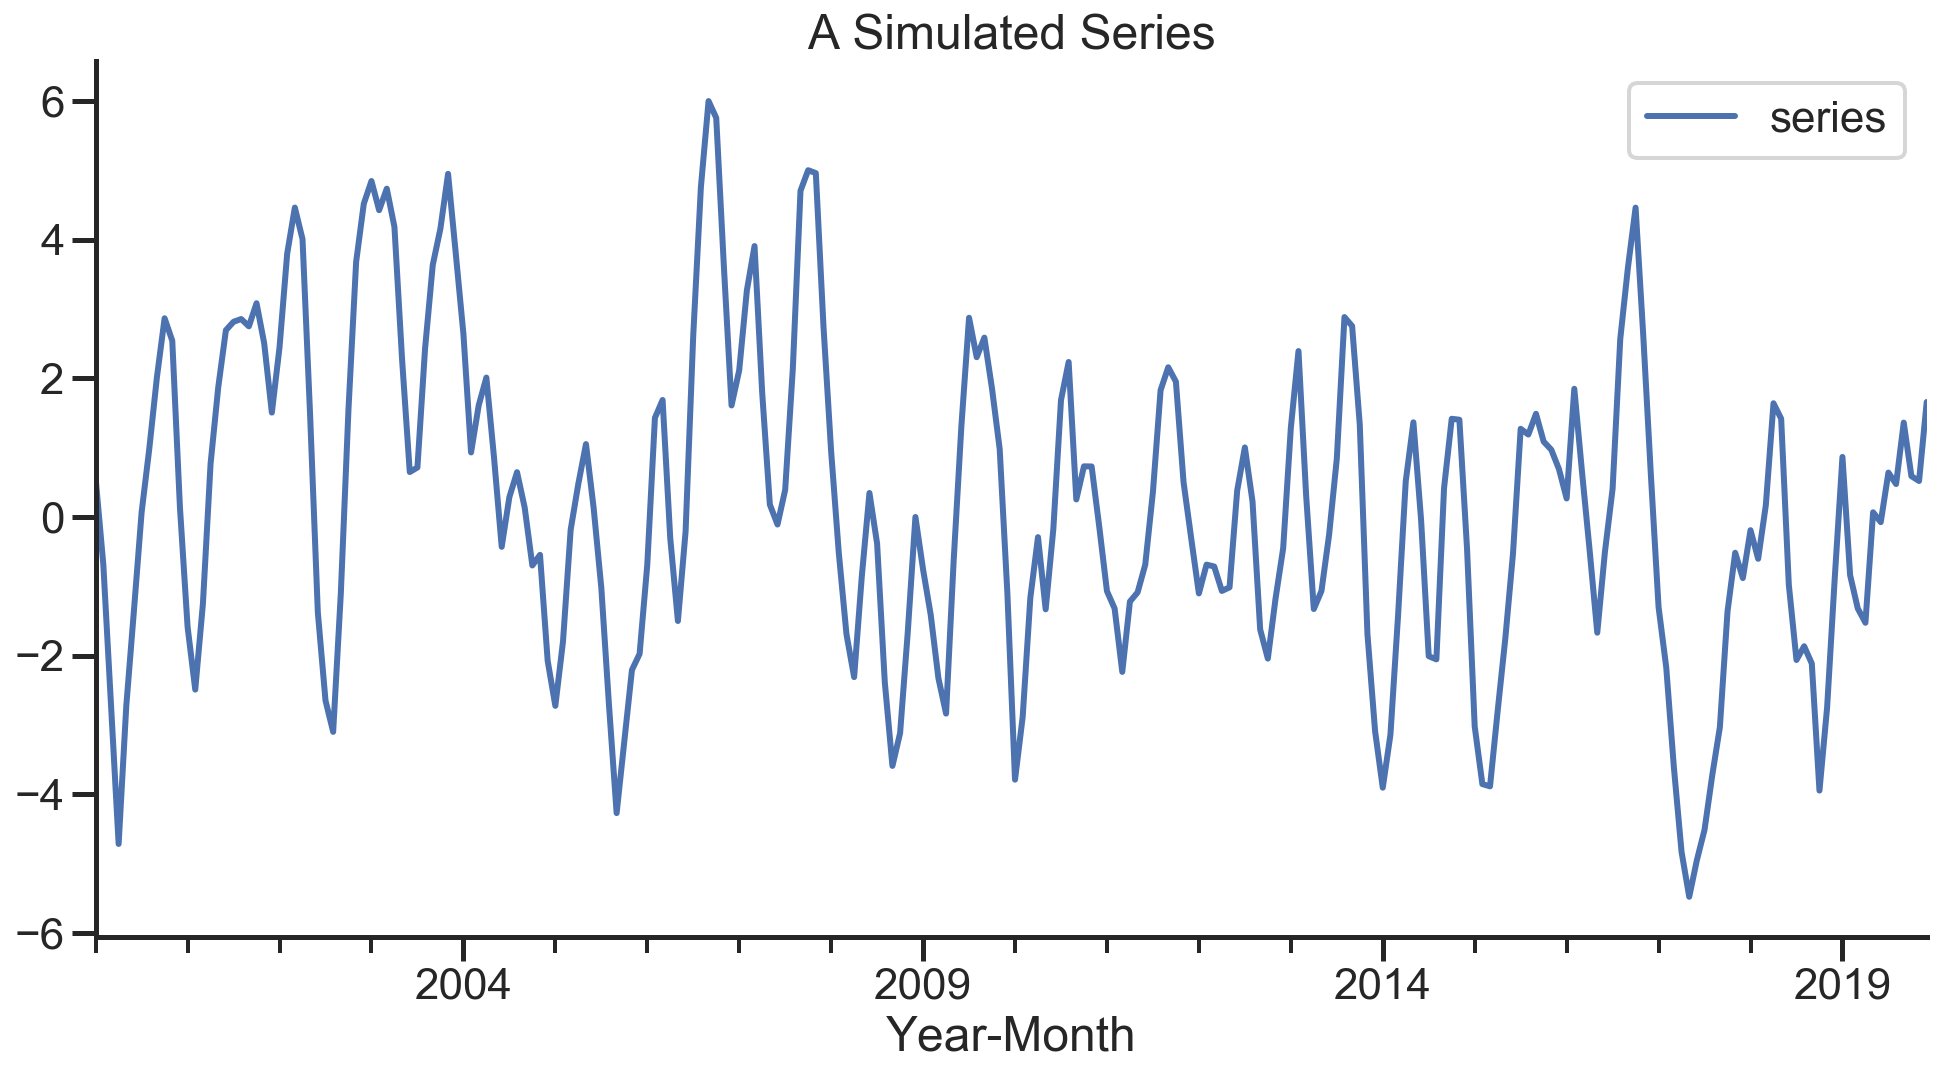

In [9]:
tsplot(y,
      'A Simulated Series',
      'Year-Month', 
      '',
      (14,8))

## EDA

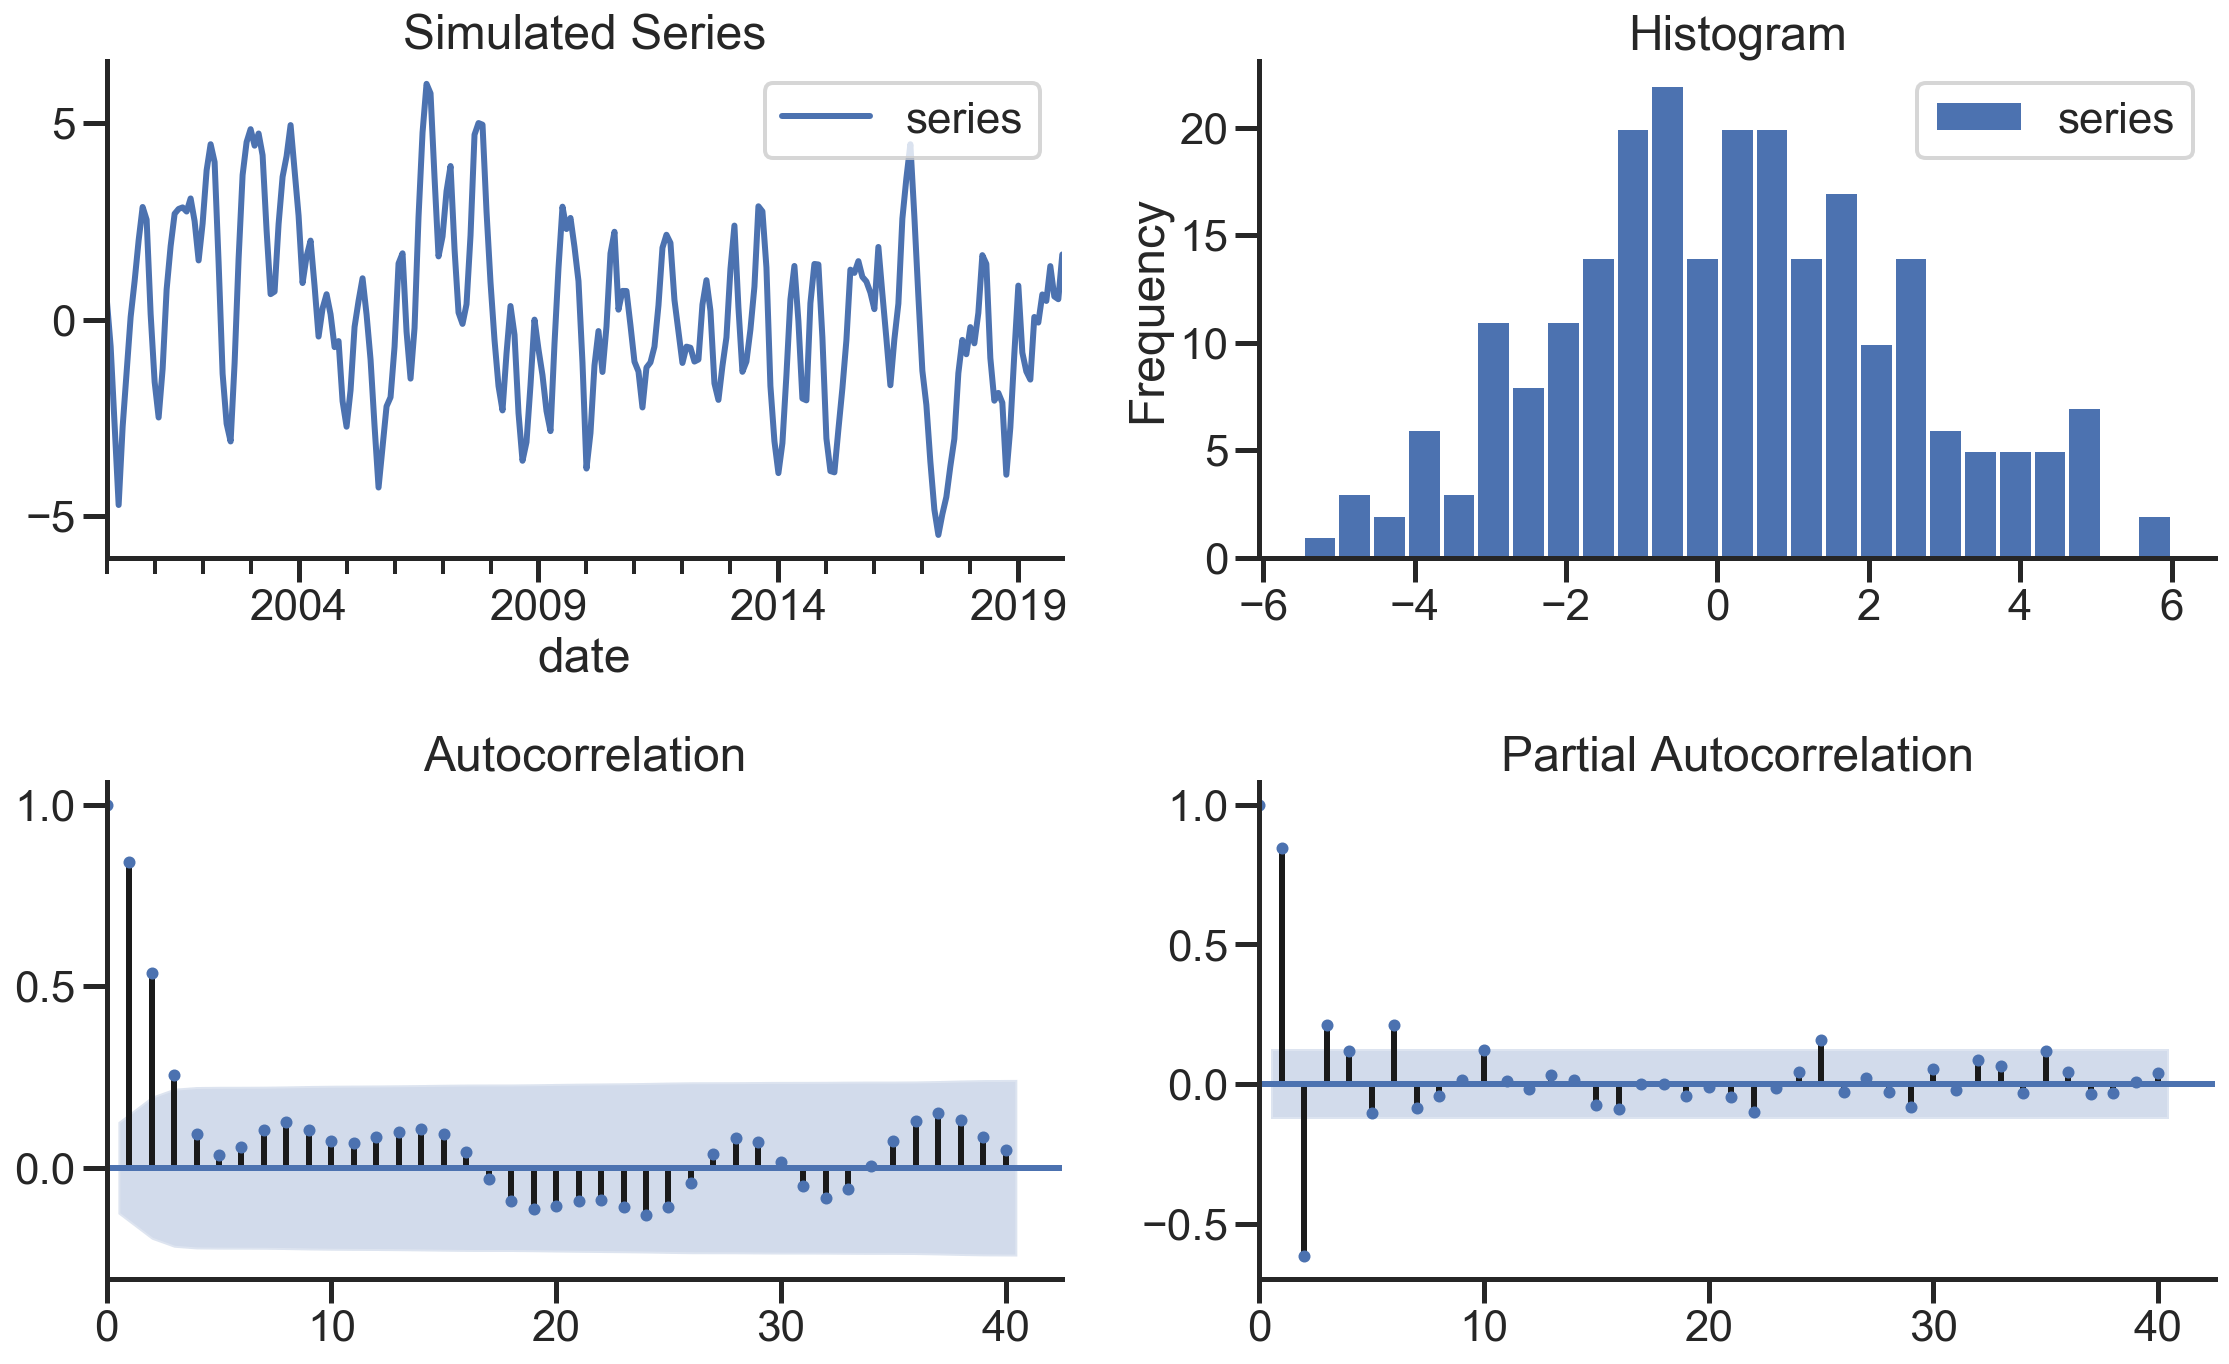

In [10]:
_ = tsplot2(y, lags=40, title='Simulated Series')

## Estimation

In [11]:
#Estimate the model using SARIMAX
arma22 = sm.tsa.statespace.SARIMAX(y, order=(2,0,2), seasonal_order=(0, 0, 0, 0))
arma22_results = arma22.fit(disp=False)
print(arma22_results.summary())

                               SARIMAX Results                                
Dep. Variable:                 series   No. Observations:                  240
Model:               SARIMAX(2, 0, 2)   Log Likelihood                -326.036
Date:                Fri, 10 Jul 2020   AIC                            662.072
Time:                        08:20:53   BIC                            679.475
Sample:                    01-31-2000   HQIC                           669.084
                         - 12-31-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6813      0.140      4.873      0.000       0.407       0.955
ar.L2         -0.1044      0.126     -0.828      0.407      -0.351       0.143
ma.L1          0.8211      0.129      6.375      0.0

/Users/FK/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/Users/FK/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


## Diagnostics / Assumption Testing

### Model Diagnostics

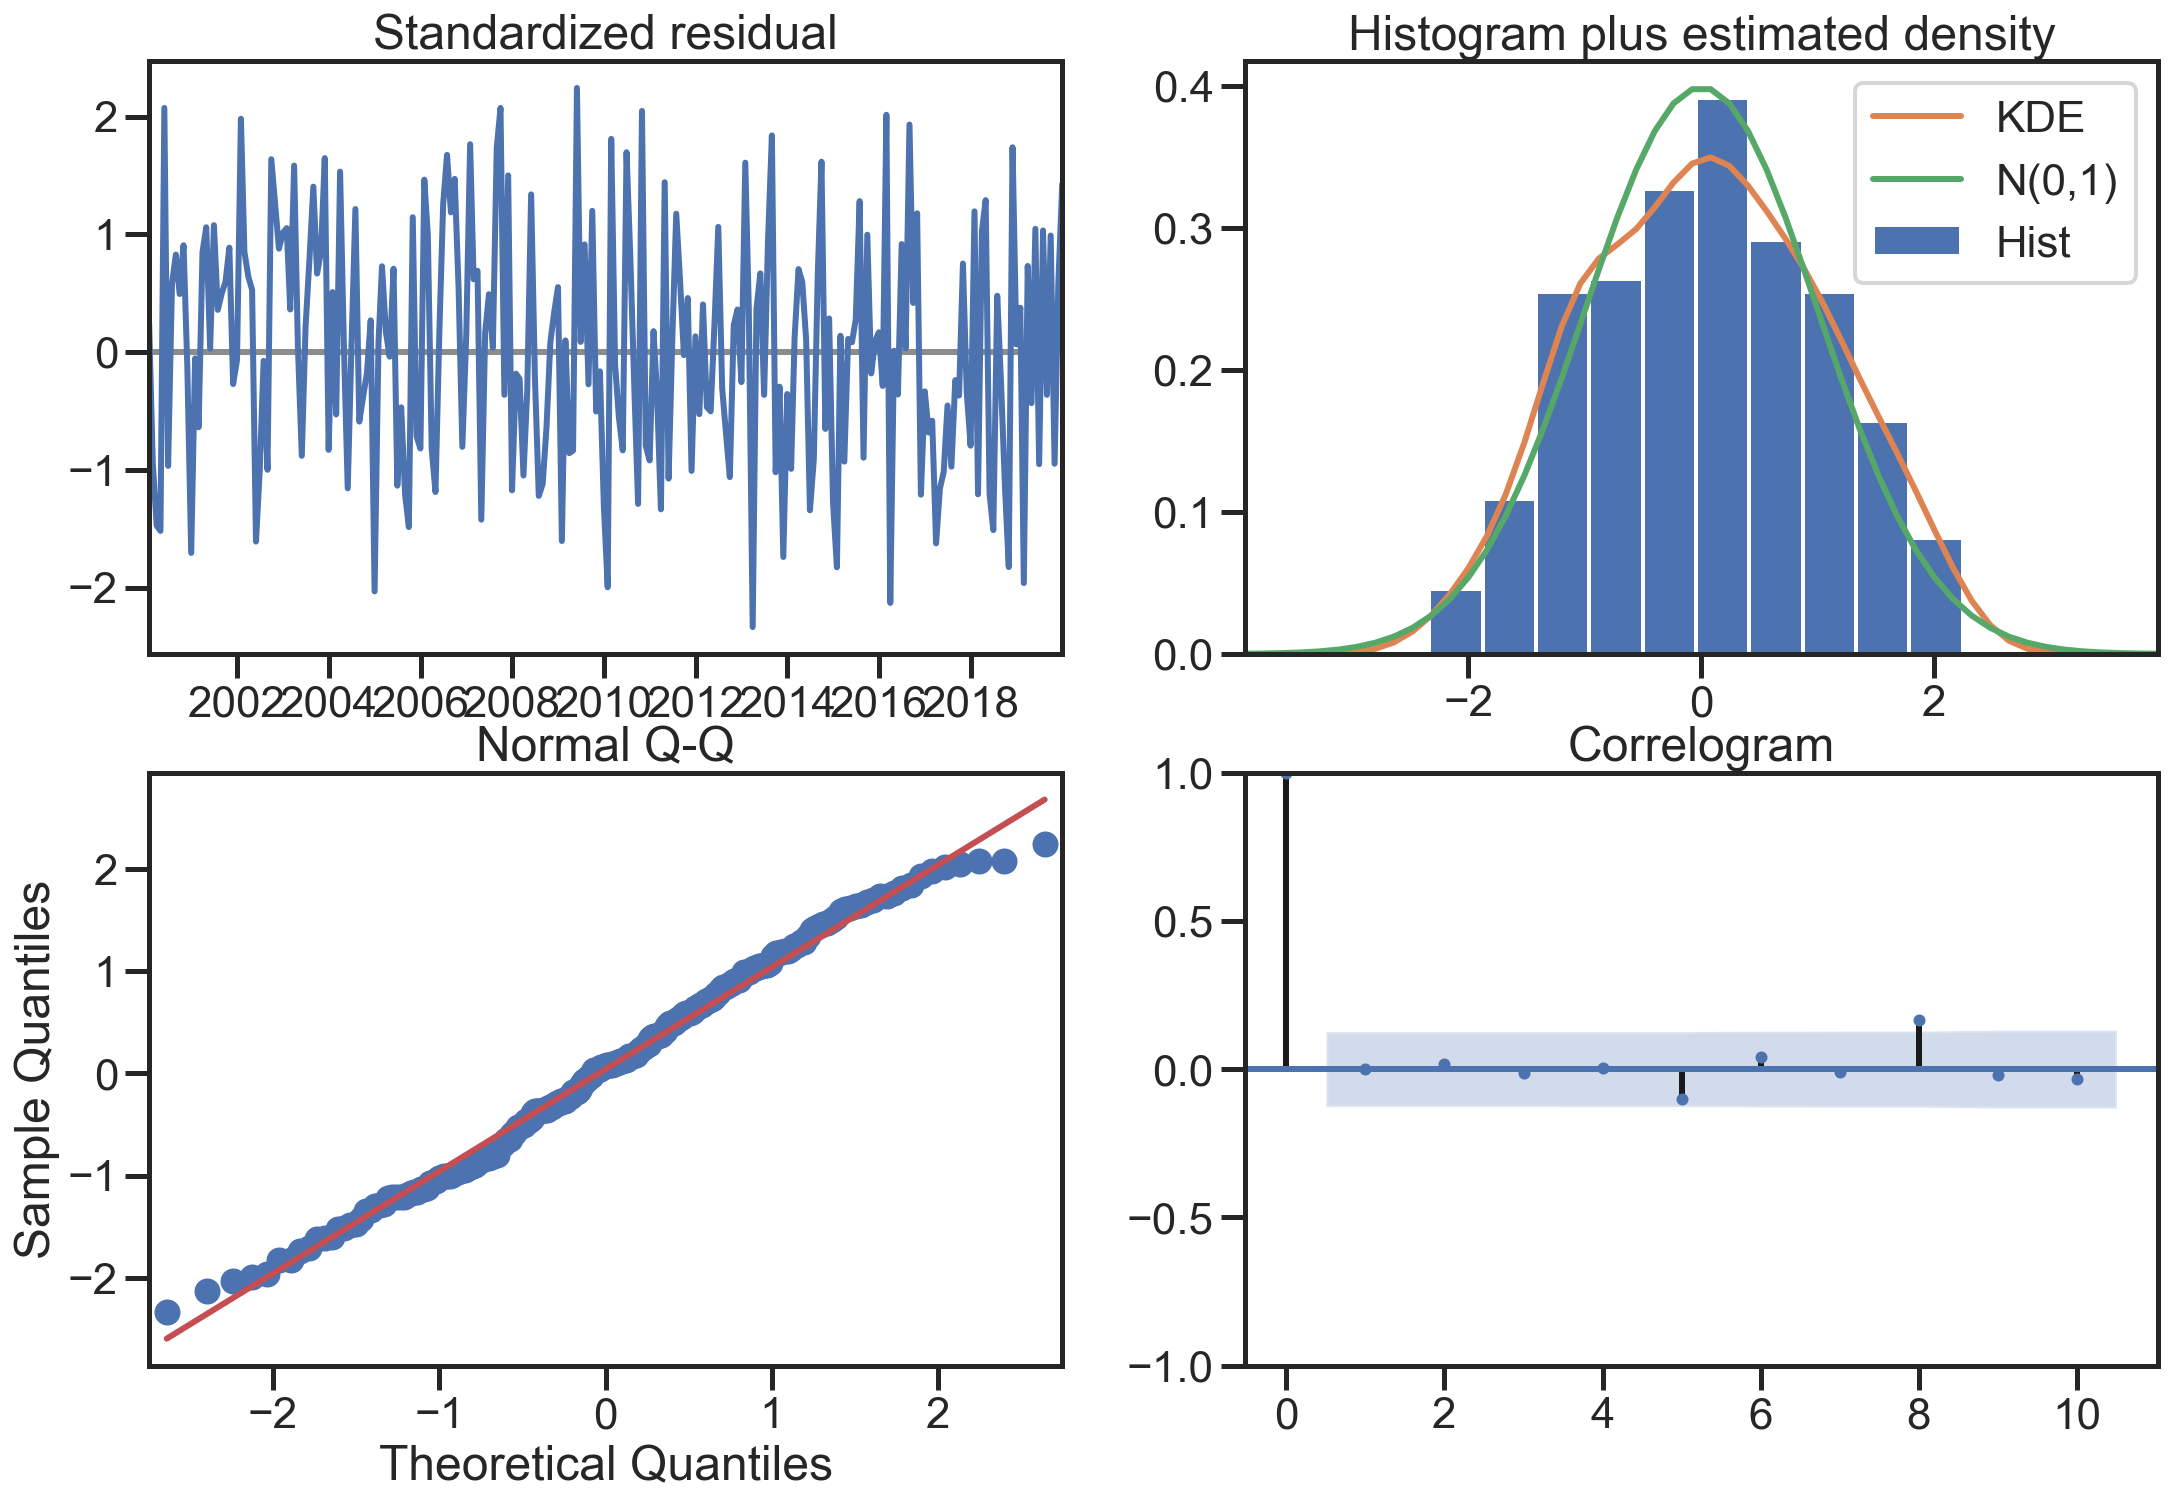

In [12]:
_ = arma22_results.plot_diagnostics(figsize=(18,12))

### Assumption Testing: Normality

In [13]:
arma22_results.test_normality('jarquebera')
# arma22_results.test_normality('jarquebera')[:,0]

array([[4.91239, 0.08576, 0.0203 , 2.30029]])

In [14]:
arma22_results.test_heteroskedasticity('breakvar')

array([[1.03163, 0.88959]])

In [15]:
arma22_results.test_serial_correlation('ljungbox')

array([[[ 0.00001,  0.06984,  0.11168,  0.11871,  2.69735,  3.14395,
          3.16488,  9.98123, 10.07243, 10.36449, 10.5005 , 12.07852,
         12.09079, 12.21112, 12.87091, 13.72824, 14.42985, 15.07524,
         15.8181 , 15.88463, 15.90866, 15.91229, 16.25108, 19.11878,
         20.05779, 20.3888 , 21.10976, 22.96276, 22.96387, 23.11311,
         23.12192, 27.62664, 27.82262, 27.85538, 28.14251, 28.14294,
         30.40634, 32.13936, 32.80244, 32.91491],
        [ 0.99812,  0.96568,  0.9904 ,  0.99831,  0.74652,  0.79058,
          0.86934,  0.26635,  0.34465,  0.40912,  0.48601,  0.43939,
          0.52021,  0.58935,  0.61227,  0.61895,  0.63648,  0.65679,
          0.66938,  0.72376,  0.77476,  0.82021,  0.84431,  0.74563,
          0.74379,  0.77278,  0.78112,  0.7349 ,  0.77819,  0.81058,
          0.84468,  0.6877 ,  0.72266,  0.76214,  0.78788,  0.82207,
          0.76993,  0.73654,  0.74735,  0.77895]]])

## Forecasting

In [16]:
arma22_results.forecast()

2020-01-31   2.43355
Freq: M, dtype: float64

In [20]:
predict = arma22_results.get_prediction()
predict_values = predict.predicted_mean
predict_ci = predict.conf_int()

In [21]:
# out of sample 2-step ahead forecast
y_fcast_h2 = arma22_results.get_forecast(steps=2)

In [22]:
y_fcast_h2.summary_frame()

series,mean,mean_se,mean_ci_lower,mean_ci_upper
2020-01-31,2.43355,0.93637,0.59831,4.26880
2020-02-29,2.11738,1.68989,-1.19475,5.42950


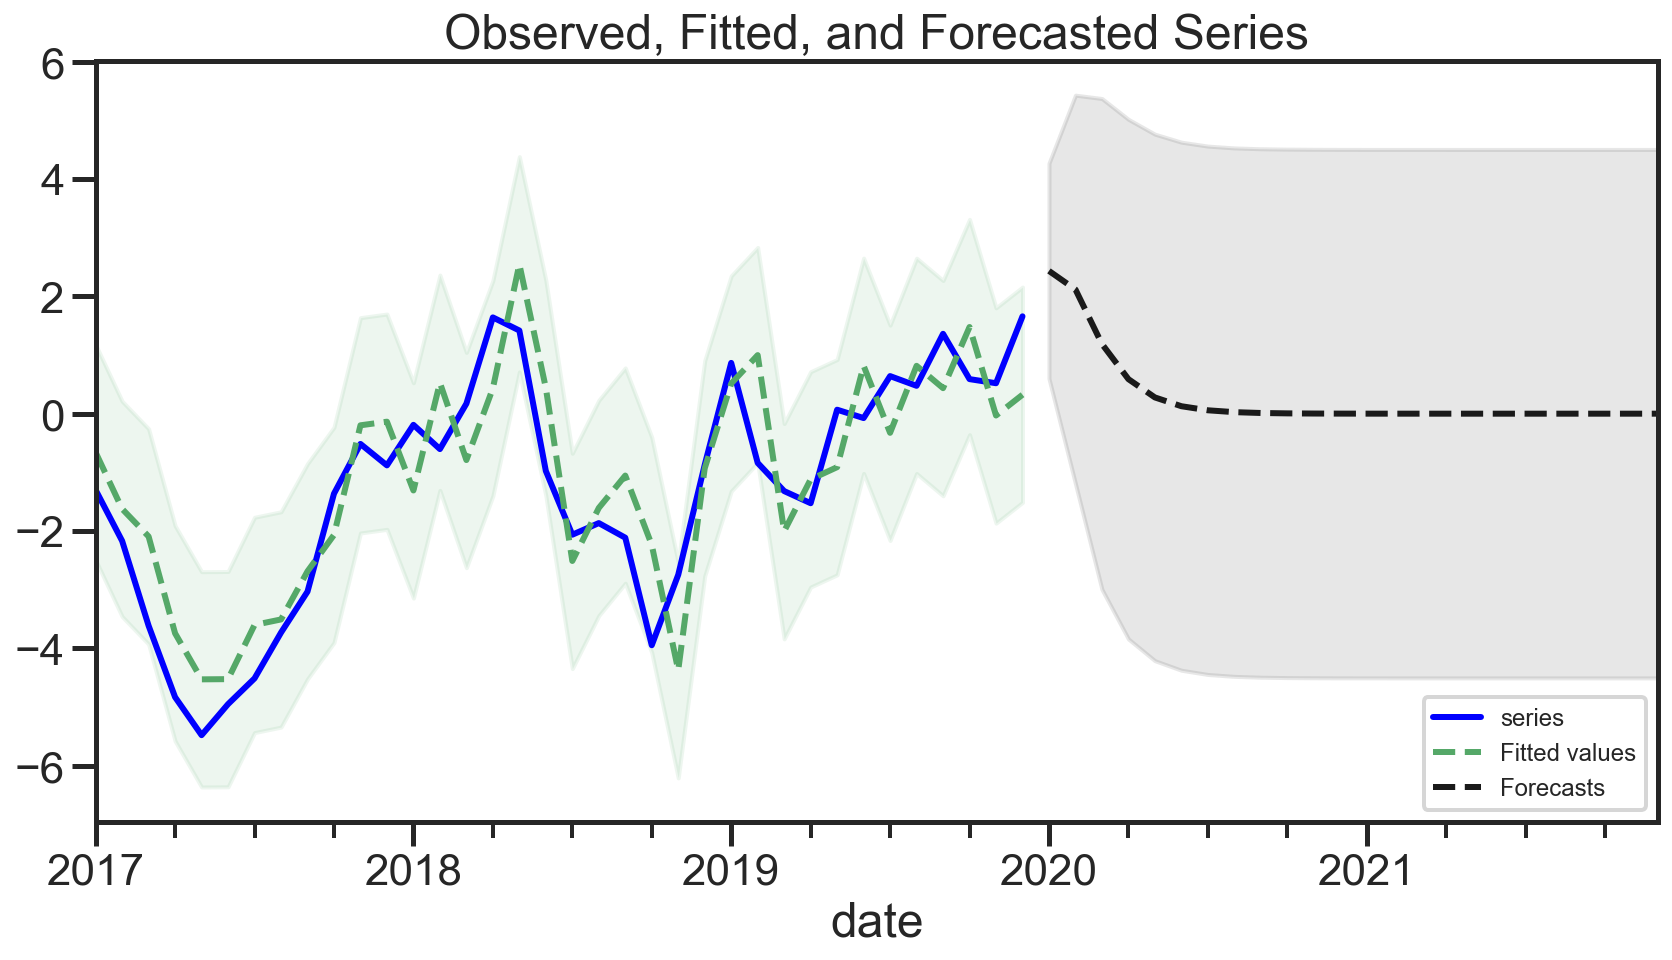

In [25]:
fig, ax = plt.subplots(figsize=(14, 7))

ax.set_title('Observed, Fitted, and Forecasted Series');
ax.set_ylabel('');
ax.set_xlabel('Year-Quarter');

# Plot the data (here we are subsetting it to get a better look at the forecasts)
y.loc['2017':].plot(ax=ax, style='blue', label='Actuals')

# Construct in-sample fit
y_est = arma22_results.get_prediction()
y_est_mean = y_est.predicted_mean
y_est_ci = y_est.conf_int(alpha=0.05)

# Construct out-of-sample forecasts
y_fcast_h12 = arma22_results.get_forecast(steps=24).summary_frame()

#fcast = res.get_forecast(steps=12).summary_frame()
y_est_mean.loc['2017':].plot(ax=ax, style='g--', label='Fitted values')
y_fcast_h12['mean'].plot(ax=ax, style='k--', label='Forecasts')

ax.fill_between(y_est_mean.loc['2017':].index, 
                y_est_ci.loc['2017':].iloc[:, 0], 
                y_est_ci.loc['2017':].iloc[:, 1], 
                color='g', alpha=0.1);

ax.fill_between(y_fcast_h12.index, y_fcast_h12['mean_ci_lower'], y_fcast_h12['mean_ci_upper'], 
                color='k', alpha=0.1);


ax.legend(loc='lower right', prop={'size': 12})

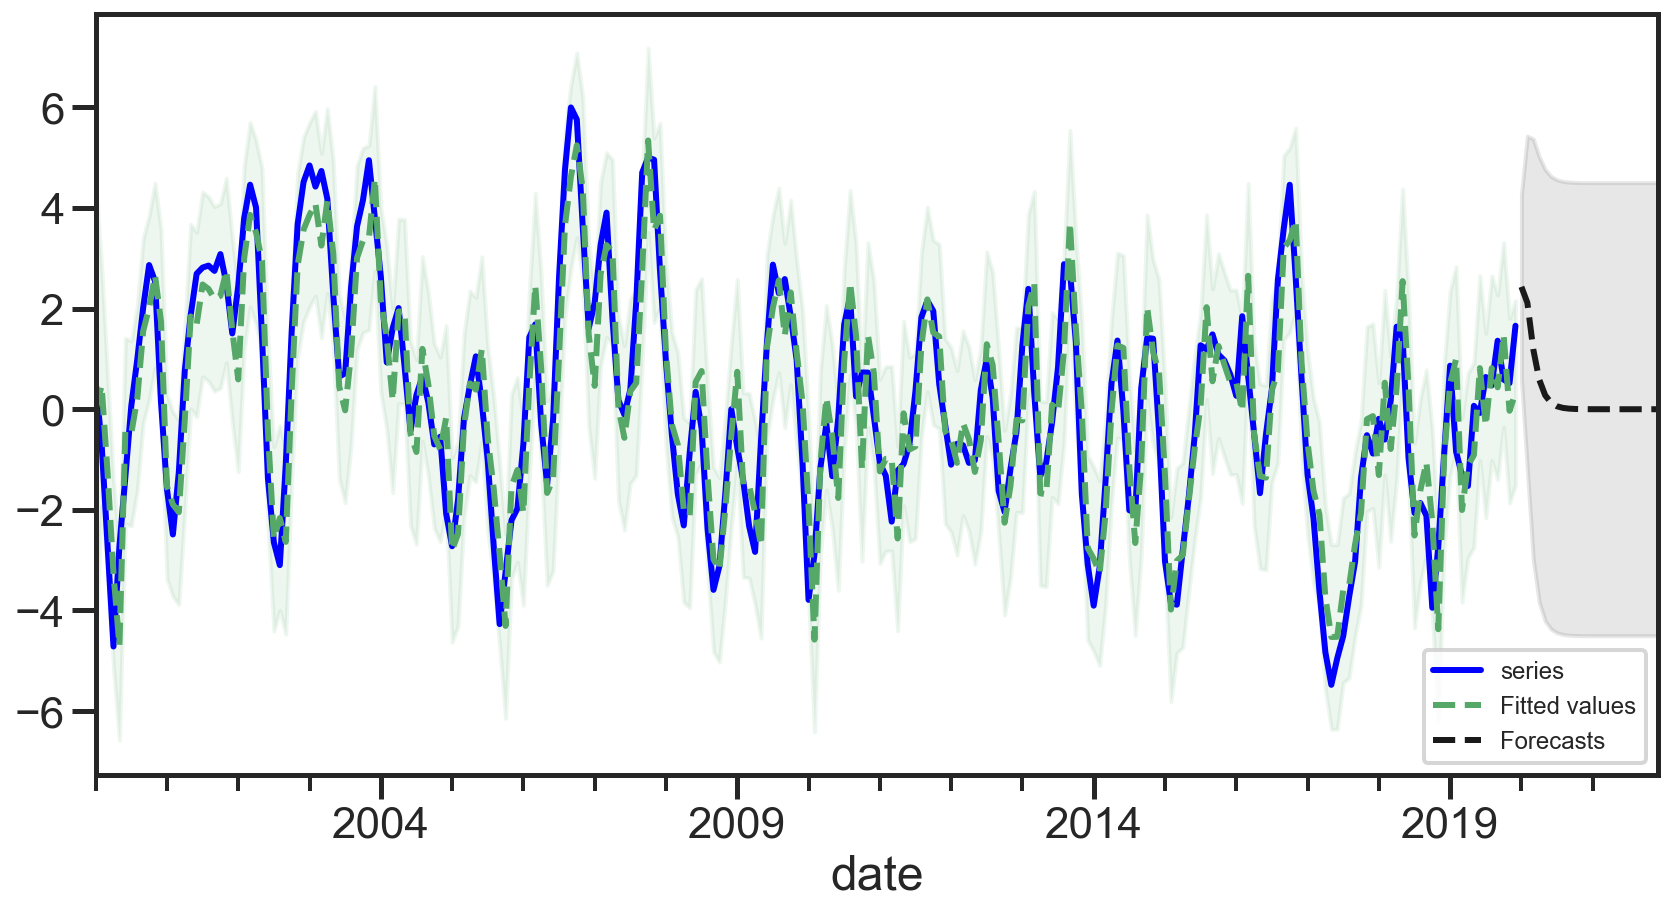

In [26]:
fig, ax = plt.subplots(figsize=(14, 7))

# Plot the data (here we are subsetting it to get a better look at the forecasts)
y.plot(ax=ax, style='blue', label='Actuals')

# Construct in-sample fit
y_est = arma22_results.get_prediction()
y_est_mean = y_est.predicted_mean
y_est_ci = y_est.conf_int(alpha=0.05)

# Construct out-of-sample forecasts
y_fcast_h12 = arma22_results.get_forecast(steps=24).summary_frame()

#fcast = res.get_forecast(steps=12).summary_frame()
y_est_mean.plot(ax=ax, style='g--', label='Fitted values')
y_fcast_h12['mean'].plot(ax=ax, style='k--', label='Forecasts')

ax.fill_between(y_est_mean.index, 
                y_est_ci.iloc[:, 0], 
                y_est_ci.iloc[:, 1], 
                color='g', alpha=0.1);

ax.fill_between(y_fcast_h12.index, y_fcast_h12['mean_ci_lower'], y_fcast_h12['mean_ci_upper'], 
                color='k', alpha=0.1);


ax.legend(loc='lower right', prop={'size': 12})

# Exercise (only if time permits)

Use `series1` and repeat the steps for developing an ARMA model and use it for forecasting.